In [3]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load datasets
Customer_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement_df= pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_df= pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [5]:
# printing the first five rows of the customer dataset
Customer_df.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [6]:
# printing the first five rows of the engagement dataset
engagement_df.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [7]:
# printing the first five rows of the marketing dataset
marketing_df.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [8]:
# printing the first five rows of the transactions dataset
transactions_df.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [9]:
# determining rows and columns of each data set
Customer_df.shape

(10000, 6)

In [10]:
engagement_df.shape

(10000, 4)

In [11]:
transactions_df.shape

(129545, 5)

In [12]:
marketing_df.shape

(25200, 5)

In [14]:
# Merging the 4 data sets into 1
df = Customer_df.merge(engagement_df, on='customer_id',how='outer')\
                .merge(marketing_df, on='customer_id', how='outer')\
                .merge(transactions_df, on='customer_id', how='outer')

print(df)

        customer_id   join_date last_purchase_date   age  gender  \
0                 1  2023-11-20         2024-03-17  56.0  Female   
1                 1  2023-11-20         2024-03-17  56.0  Female   
2                 1  2023-11-20         2024-03-17  56.0  Female   
3                 1  2023-11-20         2024-03-17  56.0  Female   
4                 1  2023-11-20         2024-03-17  56.0  Female   
...             ...         ...                ...   ...     ...   
327246        10000  2023-05-26         2023-09-01  67.0    Male   
327247        10000  2023-05-26         2023-09-01  67.0    Male   
327248        10000  2023-05-26         2023-09-01  67.0    Male   
327249        10000  2023-05-26         2023-09-01  67.0    Male   
327250        10000  2023-05-26         2023-09-01  67.0    Male   

                 location  number_of_site_visits  number_of_emails_opened  \
0       North Shannonbury                     10                       15   
1       North Shannonbury    

In [25]:
# Eliminate duplicates based on customer id
df.drop_duplicates(subset='customer_id',keep='first', inplace=True)

In [26]:
# Reviewing the data - looking for outliers
df.describe()

,customer_id,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,transaction_id,transaction_amount
count,10000.00000,8991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.467467,100.111900,39.862100,19.725300,12605.207500,64788.964600,607.624464
std,2886.89568,15.094380,118.625052,46.511719,22.975083,7284.620092,37459.595865,497.576292
min,1.00000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.020000
25%,2500.75000,30.000000,15.000000,6.000000,3.000000,6273.250000,32493.750000,233.885000
50%,5000.50000,44.000000,53.000000,22.000000,11.000000,12599.500000,64691.000000,439.665000
75%,7500.25000,57.000000,141.000000,57.000000,28.000000,18930.500000,97417.000000,863.667500
max,10000.00000,69.000000,711.000000,303.000000,142.000000,25199.000000,129536.000000,1999.740000


In [27]:
# Isolate possible outlier for review
df[df['number_of_site_visits']==711]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
131986,4053,2020-04-25,2024-04-27,33.0,Female,New Douglasstad,711,17,1,10180,No,Discount,2022-11-04,52459,2021-07-20,249.5,Clothing


In [29]:
#Review structural information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 327231
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  int64  
 1   join_date                10000 non-null  object 
 2   last_purchase_date       10000 non-null  object 
 3   age                      8991 non-null   float64
 4   gender                   9467 non-null   object 
 5   location                 10000 non-null  object 
 6   number_of_site_visits    10000 non-null  int64  
 7   number_of_emails_opened  10000 non-null  int64  
 8   number_of_clicks         10000 non-null  int64  
 9   campaign_id              10000 non-null  int64  
 10  response                 10000 non-null  object 
 11  promotion_type           10000 non-null  object 
 12  campaign_date            10000 non-null  object 
 13  transaction_id           10000 non-null  int64  
 14  transaction_date         1

In [30]:
#  Fill null values with mean for age
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

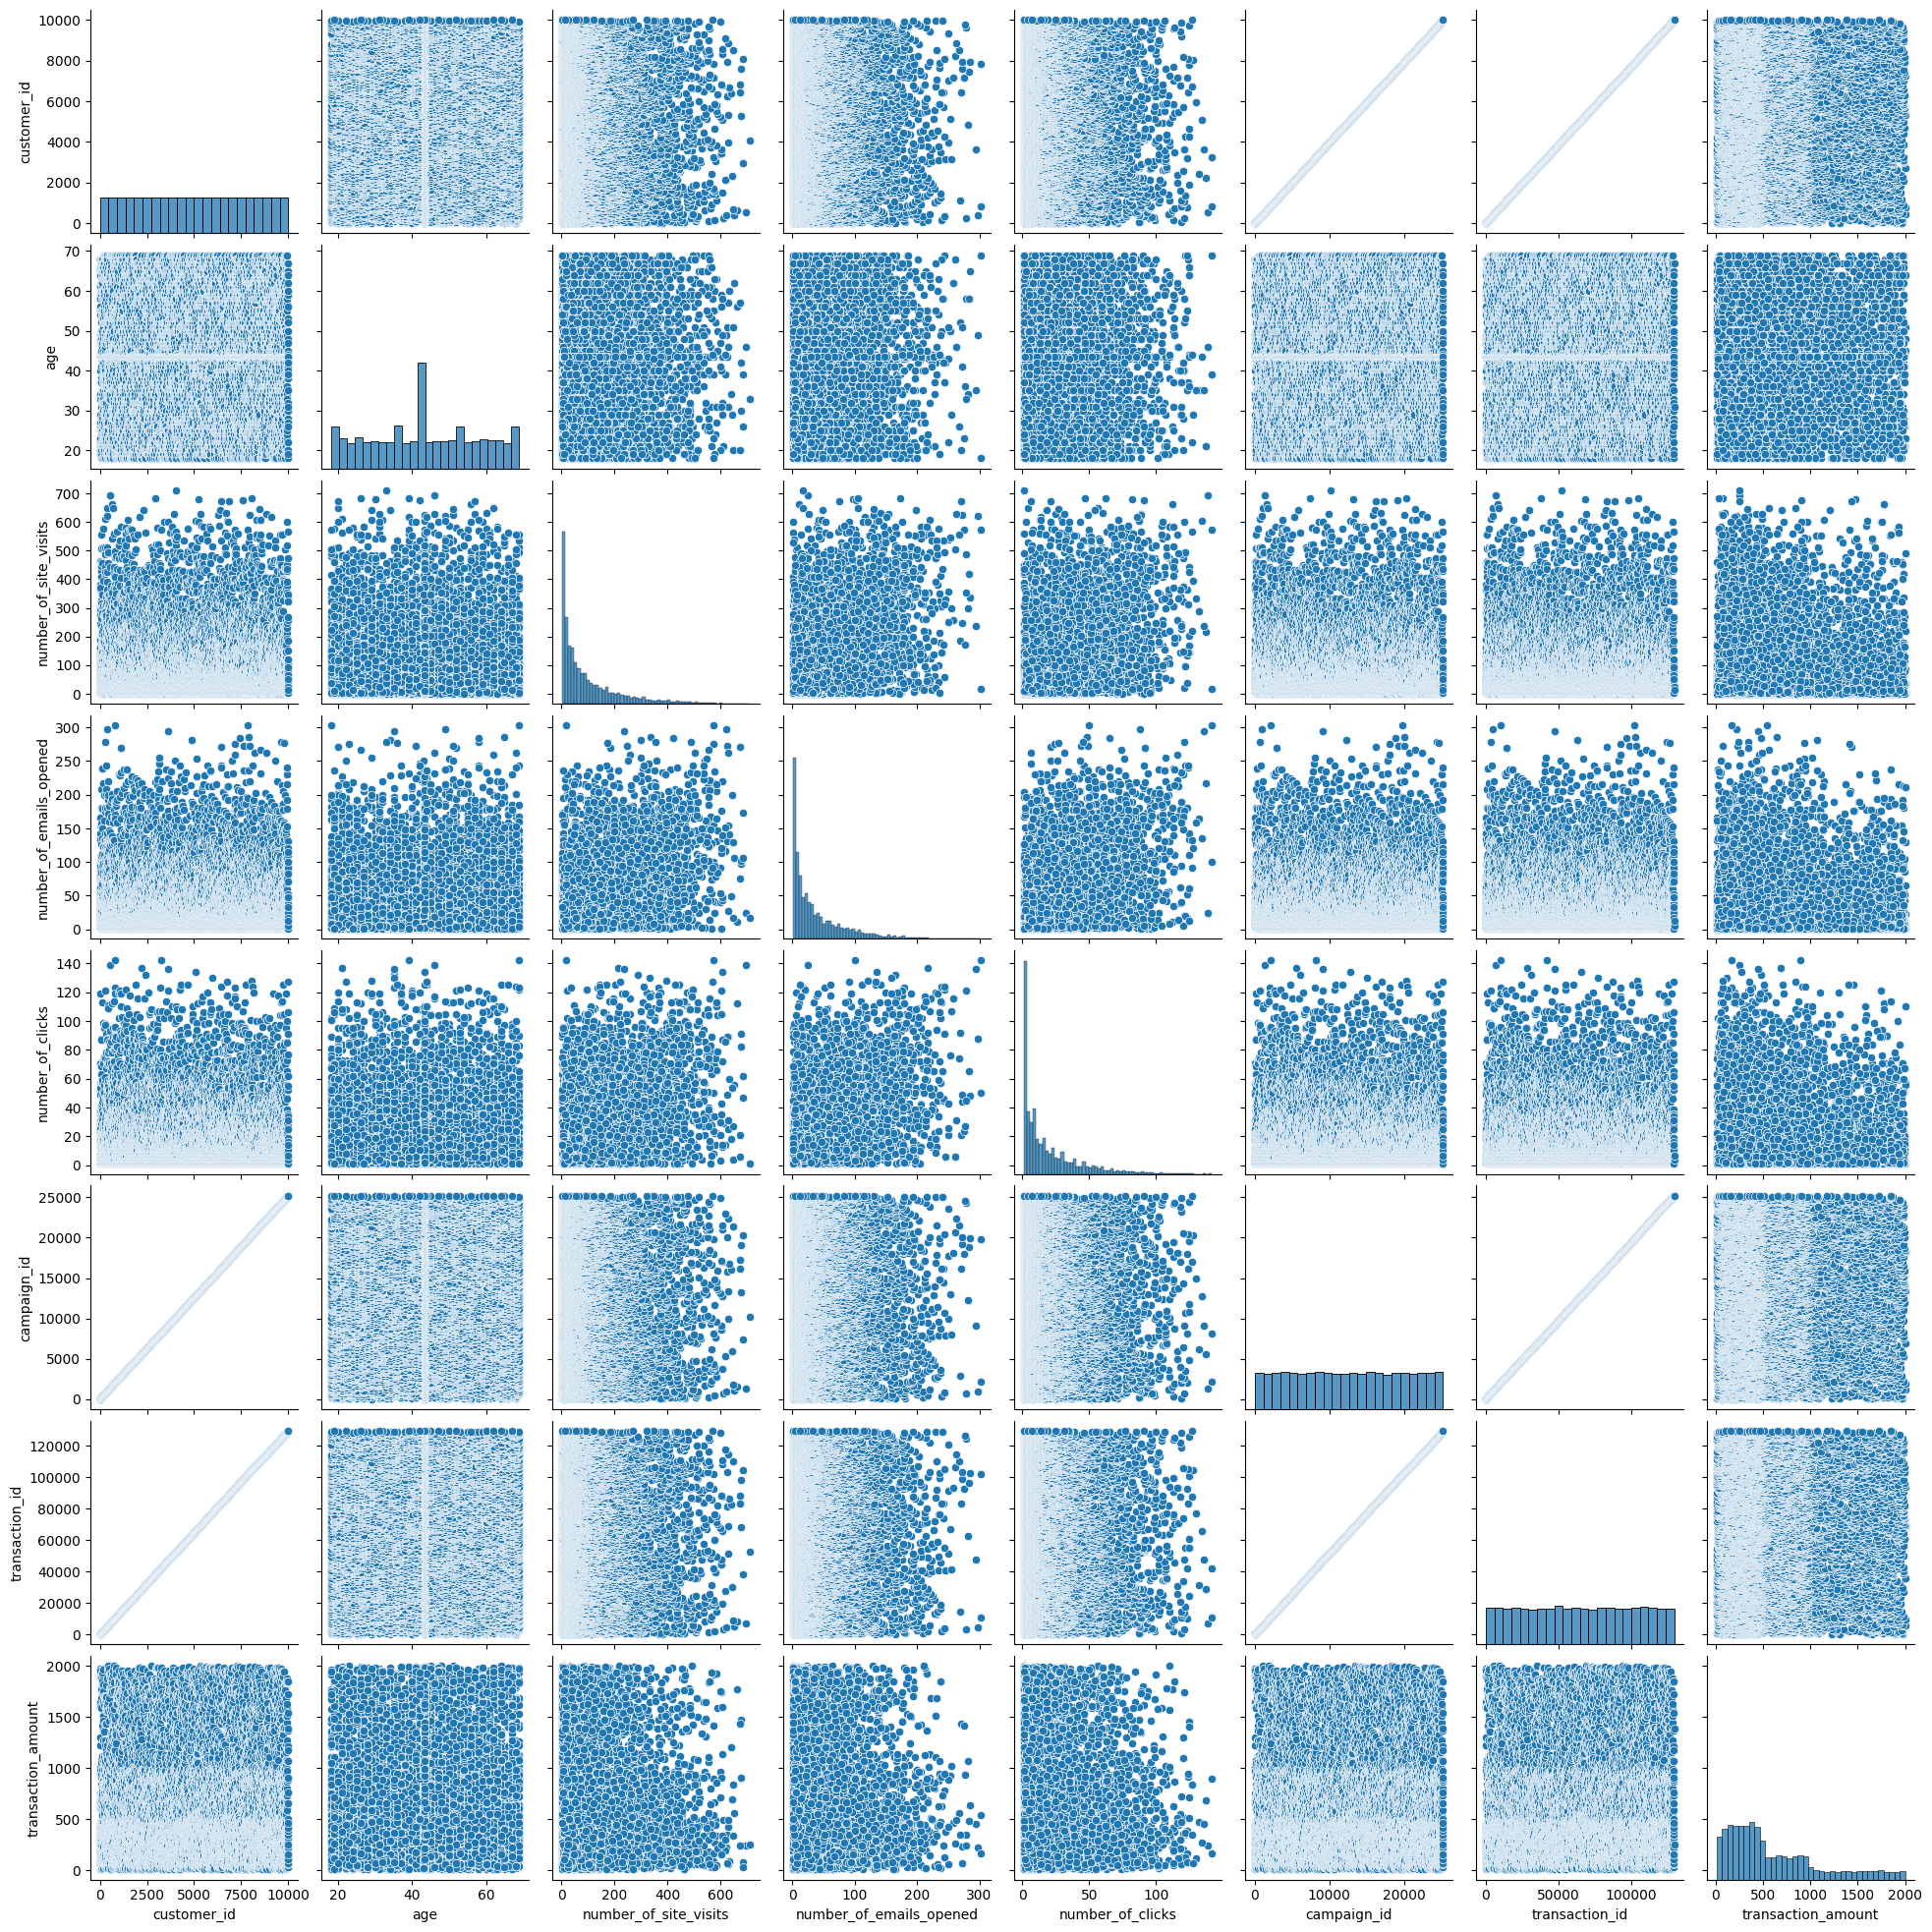

In [33]:
#  plotting data to look for relationships
sns.pairplot(df)

In [ ]:
#